In [37]:
# Import Required Packages
import numpy as np
import matplotlib.pylab as plt
from helpers import load_itk, plot_view, show_image
from math import floor

# Cropping Function

In [7]:
def find_roi_2D(s):
    """
    :param s: 2D Array
    :return: X1, X2, Y1, Y2
    """

    # rotate -90
    s_rotated = np.rot90(s, k=3)

    # flip slice
    s_fliped = np.flip(s, axis=0)
    s_rotated_fliped = np.flip(s_rotated, axis=0)

    # Get up and down coordiates
    y1 = np.unravel_index(np.argmax(s, axis=None), s.shape)
    y2 = np.unravel_index(np.argmax(s_fliped, axis=None), s.shape)

    x1 = np.unravel_index(np.argmax(s_rotated, axis=None), s.shape)
    x2 = np.unravel_index(np.argmax(s_rotated_fliped, axis=None), s.shape)

    # return x1, x2, y1, y2 of image
    return x1[0], s.shape[1]-x2[0], y1[0], s.shape[0]-y2[0]


# Testing



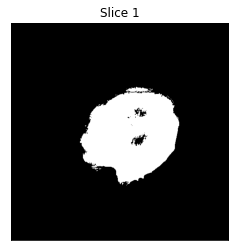

In [3]:
path = '../Dataset/trv1p1cti-heart_label.nii.gz'
_,volume,_,_ = load_itk(path)
# plot_view(volume)
slice_1 = volume[20,:,:]
show_image(slice_1,"Slice 1", 'gray')

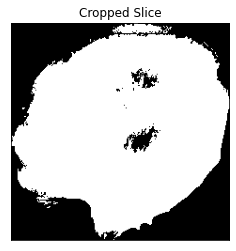

In [4]:
x1,x2,y1,y2 = find_roi_2D(slice_1)
show_image(slice_1[y1:y2, x1:x2], 'Cropped Slice')

In [42]:
# err= (volume.shape[0]/10, volume.shape[1]/10, volume.shape[2]/10)
shape = list(volume.shape)
print(shape)
err = [floor(0.08 * item) for item in shape]
print(err)
x1, x2, y1 ,y2

[64, 512, 512]
[5, 40, 40]


(162, 395, 152, 384)

(64, 313, 312)


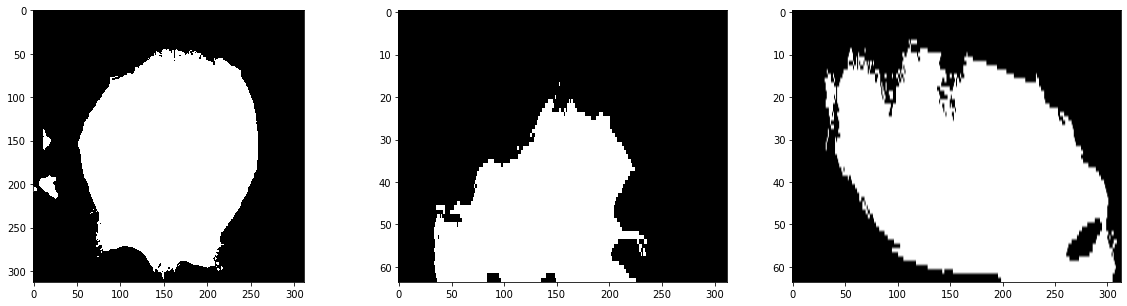

In [55]:
cropped_volume = volume[:,x1-err[2] : x2+err[2],y1-err[1] : y2+err[1]]
print(cropped_volume.shape)
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].imshow(cropped_volume[40,:,:], cmap= 'gray' , interpolation= 'nearest')
ax[1].imshow(cropped_volume[:,260,:], cmap= 'gray', aspect= 'auto', interpolation= 'nearest')
ax[2].imshow(cropped_volume[:,:,200], cmap= 'gray', aspect= 'auto')
fig.show()

# Three Views cropping

In [57]:
def get_coords(Slices: list):
    """
    Returns shape[1] then shape[0]
    :param Slices: list of 3 slices
    :return: list [x1,x2,y1,y2]
    """

    # Initiliaze coordinates
    x1 = list()
    x2 = list()
    y1 = list()
    y2 = list()

    # Find ROI in each slice
    for slice in Slices:
        pnt1, pnt2, pnt3, pnt4 = find_roi_2D(slice)
        x1.append(pnt1)
        x2.append(pnt2)
        y1.append(pnt3)
        y2.append(pnt4)
    
    # Return shape[1] then shape[0]
    return [min(x1), max(x2), min(y1), max(y2)]

